In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [6]:
books = pd.read_parquet("books.parquet")
interactions = pd.read_parquet("interactions.parquet")

In [7]:
books.head()

,book_id,author,title,description,genre_and_votes,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_year,country_code,language_code,format,is_ebook,isbn,isbn13,genre_and_votes_dict,genre_and_votes_str
3,6066819,Jennifer Weiner,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"{'Womens Fiction-Chick Lit': 739, 'Fiction': 442}",368,3.49,51184,3282,Atria Books,2009,US,eng,Hardcover,False,0743294297,9780743294294,"{'Academic': None, 'Academic-Academia': None, ...","Womens Fiction-Chick Lit 739, Fiction 442"
6,378460,Michael Halberstam,The Wanting of Levine,,"{'Politics': 1, 'Humor': 1}",<NA>,4.38,12,4,Berkley Publishing Group,1979,US,,Paperback,False,0425040887,9780425040881,"{'Academic': None, 'Academic-Academia': None, ...","Politics 1user, Humor 1user"
15,89375,"Don Piper, Cecil Murphey",90 Minutes in Heaven: A True Story of Death an...,As he is driving home from a minister's confer...,"{'Christian': 395, 'Nonfiction': 392, 'Religio...",<NA>,3.91,68157,2885,,<NA>,US,,,False,0800759494,9780800759490,"{'Academic': None, 'Academic-Academia': None, ...","Christian 395, Nonfiction 392, Religion 142, S..."
16,89376,Randy Alcorn,Heaven,What is Heaven really going to be like? What w...,"{'Christian': 225, 'Religion-Theology': 154, '...",533,4.26,7345,566,,<NA>,US,eng,,False,0842379428,9780842379427,"{'Academic': None, 'Academic-Academia': None, ...","Christian 225, Religion-Theology 154, Nonficti..."
17,89377,Jennifer L. Holm,Penny from Heaven,It's 1953 and 11-year-old Penny dreams of a su...,"{'Historical-Historical Fiction': 284, 'Childr...",288,3.98,6949,615,Random House Books for Young Readers,2006,US,,Hardcover,False,037583687X,9780375836879,"{'Academic': None, 'Academic-Academia': None, ...","Historical-Historical Fiction 284, Childrens-M..."


In [8]:
interactions.head()

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
0,8842281e1d1347389f2ab93d60773d4d,22034,2015-07-12,2015-07-17,True,5,False
1,8842281e1d1347389f2ab93d60773d4d,22318578,2015-06-07,2015-08-09,True,5,True
2,8842281e1d1347389f2ab93d60773d4d,22551730,2015-06-24,2015-07-11,True,4,True
3,8842281e1d1347389f2ab93d60773d4d,22816087,2015-09-27,2015-11-04,True,5,True
4,8842281e1d1347389f2ab93d60773d4d,20527133,2015-05-05,2015-09-06,True,0,False


In [ ]:
# количество пользователей
interactions['user_id'].nunique()

542657

In [30]:
# среднее количество прочитанных книг на пользователя
round(interactions.shape[0] / interactions['user_id'].nunique())

24

In [ ]:
# в столбце is_read все значения положительные
interactions['is_read'].value_counts()

is_read
True    12890434
Name: count, dtype: int64

In [40]:
# доля прочитанных книг, у которых нет рейтинга
print('Количество прочитанных книг без рейтинга:', interactions[interactions['rating'] == 0].shape[0])
print('Доля прочитанных книг, у которых нет рейтинга: ', round(interactions[interactions['rating'] == 0].shape[0] / interactions.shape[0] * 100, 2), '%')

Количество прочитанных книг без рейтинга: 1051672
Доля прочитанных книг, у которых нет рейтинга:  8.16 %


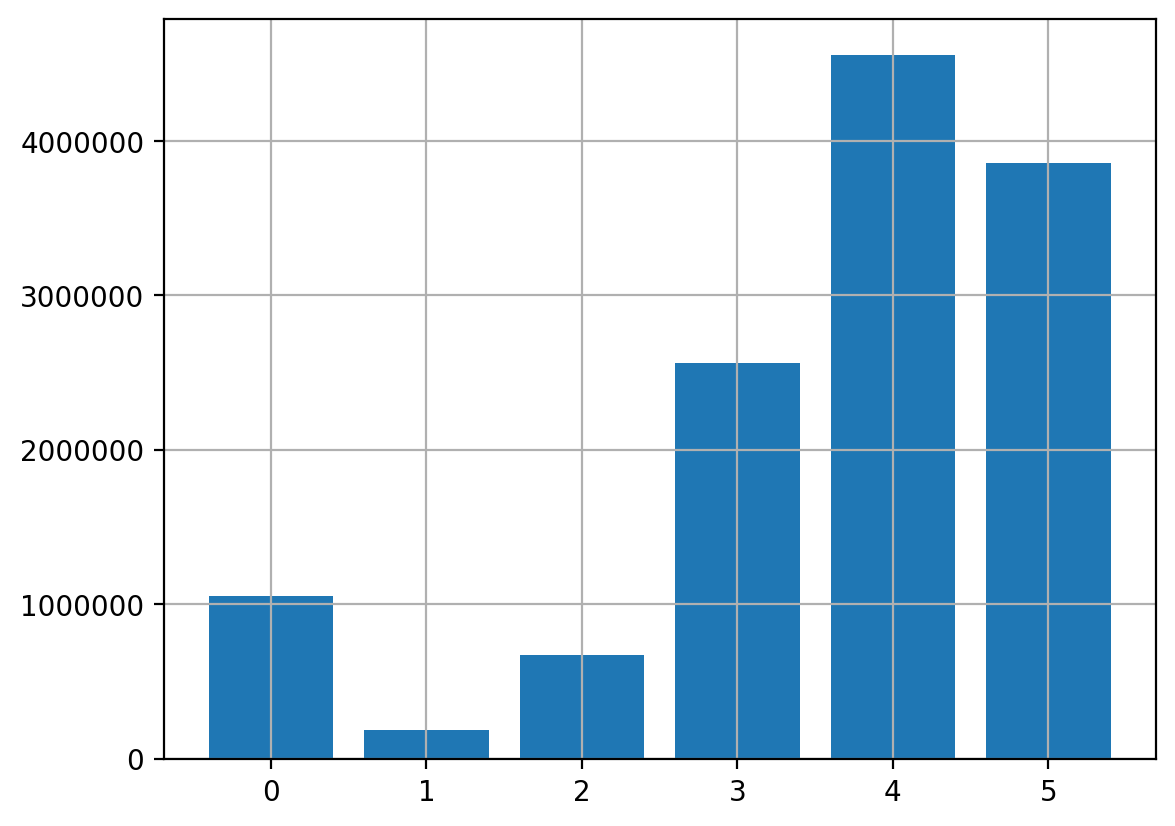

In [73]:
# распределение рейтинга
plt.bar(sorted(interactions['rating'].unique()), interactions['rating'].value_counts().sort_index().values)
plt.ticklabel_format(style='plain')
plt.grid()

In [85]:
# распределение популярности (доля пользователей, приходящаяся на одну книгу)
books_id = sorted(interactions['book_id'].unique())
books_readers = []
for i in books_id:
    books_readers.append(interactions[interactions['book_id'] == i].shape[0])


In [94]:
print('max', max(books_readers))
print('min', min(books_readers))
print('mean', np.mean(books_readers))
print('median', np.median(books_readers))

max 45201
min 1
mean 307.5595056308456
median 52.0


In [95]:
interactions['started_at'].describe()

count       12890434
unique          3988
top       2016-01-01
freq           24782
Name: started_at, dtype: object

(array([   6886.,    6864.,   88850.,  457735.,  948544., 1761415.,
        2199744., 2457171., 2757043., 2206182.]),
 array([13514. , 13915.7, 14317.4, 14719.1, 15120.8, 15522.5, 15924.2,
        16325.9, 16727.6, 17129.3, 17531. ]),
 <BarContainer object of 10 artists>)

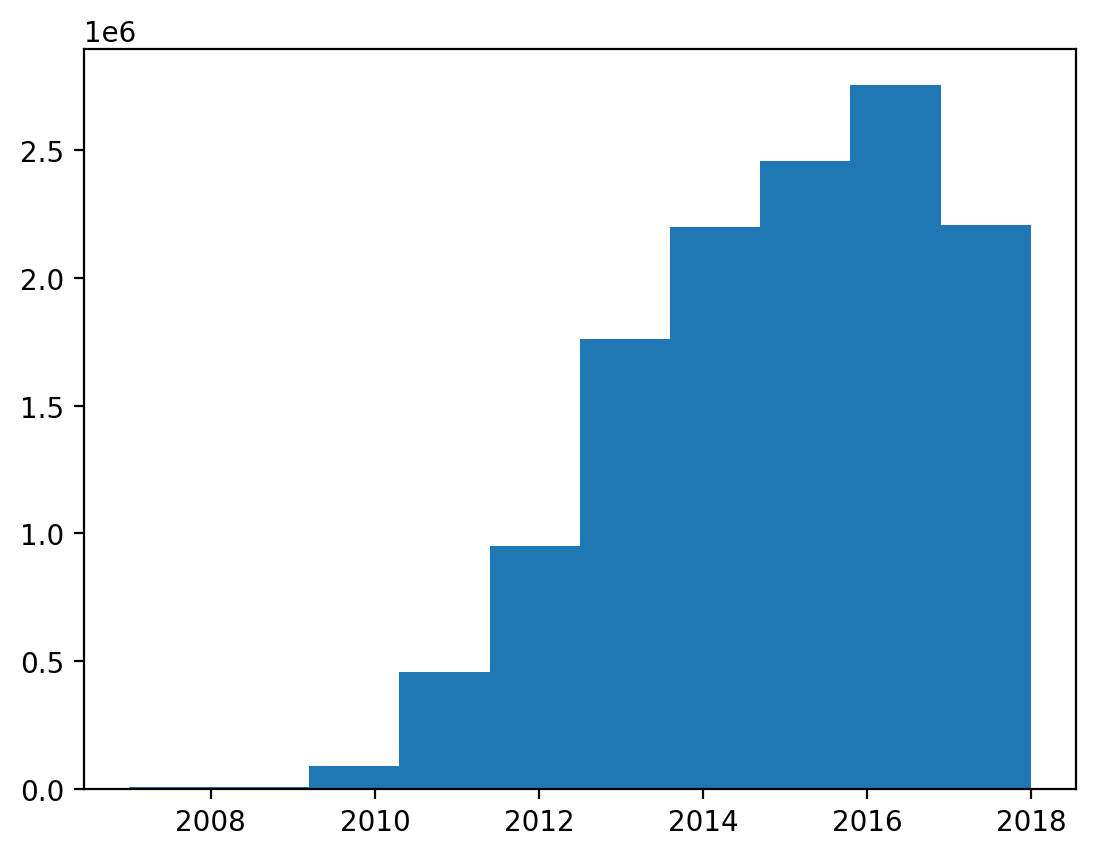

In [103]:
plt.hist(interactions['started_at'])

(array([   6495.,    6629.,   73064.,  431557.,  897442., 1701650.,
        2177762., 2466128., 2790457., 2339250.]),
 array([13514. , 13915.7, 14317.4, 14719.1, 15120.8, 15522.5, 15924.2,
        16325.9, 16727.6, 17129.3, 17531. ]),
 <BarContainer object of 10 artists>)

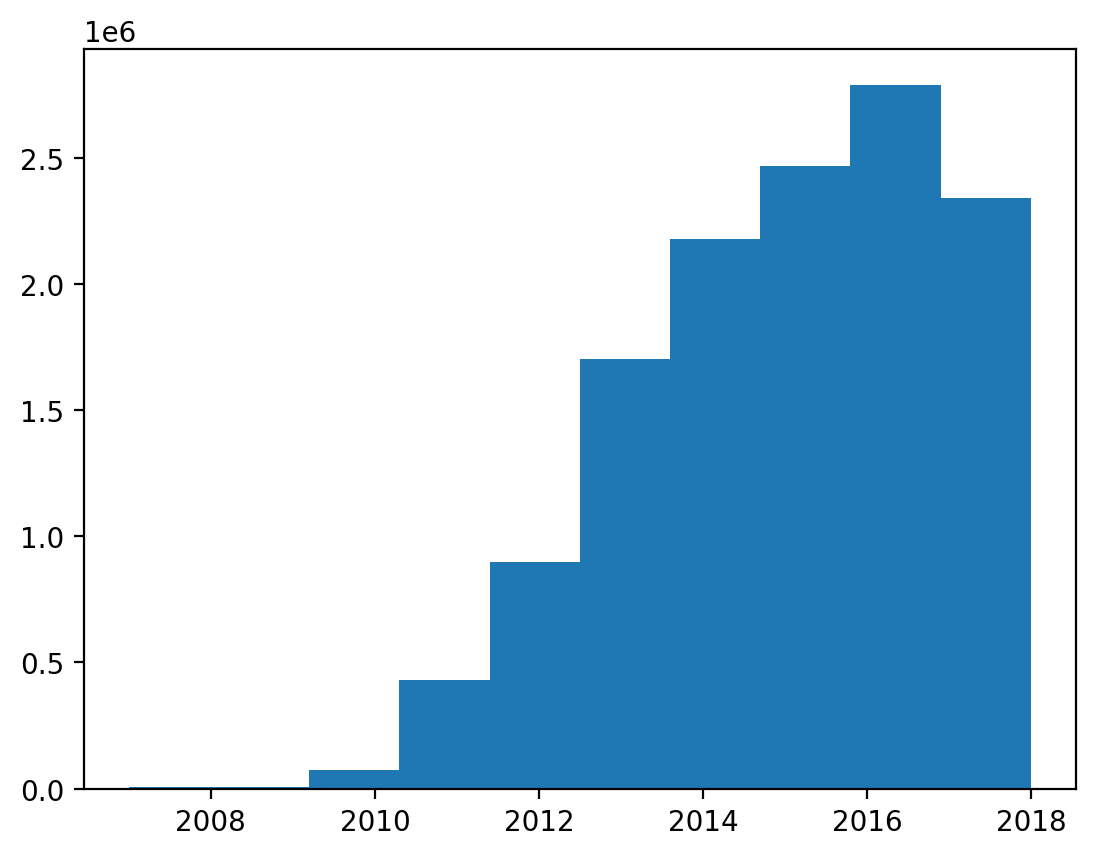

In [100]:
plt.hist(interactions['read_at'])